### 딥-러닝 과정 CNN 

### 두번째 실습. Keras 모델 생성/학습 - MNIST : CNN
[Keras Dataset](https://keras.io/ko/datasets/#mnist)

In [1]:
# 1. 데이터 불러오기
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


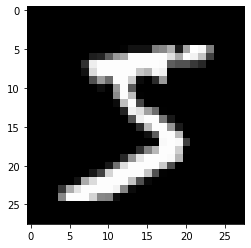

In [2]:
# 2. 이미지 데이터 확인하기 🖼
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap=plt.cm.gray)

In [3]:
# 3-1. 이미지 데이터 전처리 : 2차원->3차원 🌟🌟🌟
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
# X_train = X_train.reshape(X_train.shaep[0], 28, 28, 1)
# X_test = X_test.reshape(-1, 28, 28, 1)
# 이런식으로도 가능하다.

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
# 3-2. 이미지 데이터 전처리 : Normalzation 
X_train = X_train/255
X_test = X_test/255

print(X_train)
print(X_train.shape)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [5]:
import numpy as np
a = np.unique(X_train)
print(a)

[0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922 0.30196078
 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863 0.3254902
 0.32941176 0.33333333 0.3372549  0.34117647 0.34509804 0.349019

In [6]:
# 4. Label 전처리 (one-hot encoding) 
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [7]:
# 5. 모델 생성 : CNN 🌟🌟🌟
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Activation, Conv2D,MaxPooling2D,Flatten

model = keras.Sequential()

model.add(Conv2D(filters=128, # units 노드수 필터 개수
                kernel_size=(3,3), # 필터의 사이즈(홀수)
                input_shape=(28, 28, 1), # input_shape=X_train[0].shape도 가능 
                padding='same' , # 이미지 사이즈 유지할것인가? valid는 반대로 유지하지 않는다.
                activation='relu'))

model.add(Conv2D(64, (3,3),
padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 항상 summary를 하는 것이 좋다.
model.summary()

In [8]:
# 6. Compile - Optimizer, Loss function 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# 7. 모델 학습시키기
# 이미지는 MLP보다는 CNN이 더 좋다. 대신 학습이 조금 느리다.
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

hist = model.fit(X_train, y_train, validation_split=0.1, batch_size=64, epochs=300, verbose=1, callbacks=[early_stopping])

Epoch 1/300
844/844 [==============================] - 125s 148ms/step - loss: 0.3066 - accuracy: 0.9049 - val_loss: 0.0576 - val_accuracy: 0.9832
Epoch 2/300
844/844 [==============================] - 125s 148ms/step - loss: 0.0424 - accuracy: 0.9862 - val_loss: 0.0411 - val_accuracy: 0.9900
Epoch 3/300
844/844 [==============================] - 125s 149ms/step - loss: 0.0236 - accuracy: 0.9918 - val_loss: 0.0404 - val_accuracy: 0.9902
Epoch 4/300
844/844 [==============================] - 125s 148ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.0403 - val_accuracy: 0.9898
Epoch 5/300
844/844 [==============================] - 125s 148ms/step - loss: 0.0124 - accuracy: 0.9957 - val_loss: 0.0497 - val_accuracy: 0.9898
Epoch 6/300
844/844 [==============================] - 124s 147ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.0473 - val_accuracy: 0.9907
Epoch 7/300
844/844 [==============================] - 124s 147ms/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 0

In [10]:
# 8. 모델 평가하기
train_result = model.evaluate(X_train, y_train)
test_result = model.evaluate(X_test, y_test)

print(train_result, test_result)

313/313 [==============================] - 5s 15ms/step - loss: 0.0440 - accuracy: 0.9915
[0.006732490845024586, 0.9985499978065491] [0.044011060148477554, 0.9915000200271606]


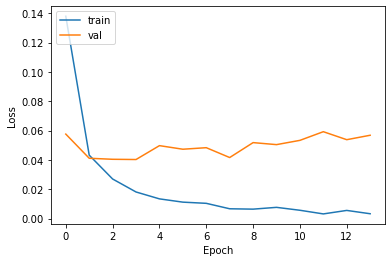

In [11]:
# 9. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

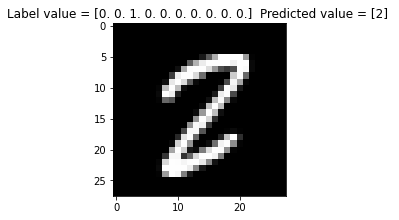

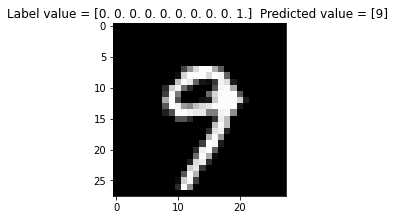

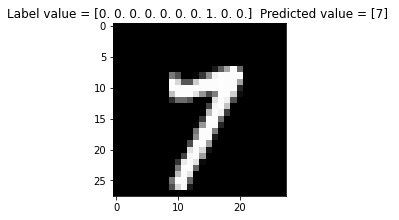

In [13]:
# 10. 학습 시각화하기
import numpy as np
for index in np.random.choice(len(y_test), 3, replace = False):
    # 3차원으로 모델링해서 reshape도 3차원으로 해야지 인식이 가능하다.
    test_image = X_test[index].reshape(1, 28, 28, 1)
    predicted = model.predict(test_image)
    label = y_test[index]
    result_label = np.where(label == np.amax(label))
    result_predicted = np.where(predicted == np.amax(predicted))
    title = "Label value = %s  Predicted value = %s " % (label, result_predicted[1])
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = X_test
    plt.imshow(images[index].reshape(28, 28), cmap = plt.cm.gray, interpolation = 'nearest')
    plt.show()
